# Dataset [link](https://archive.ics.uci.edu/ml/datasets/Statlog+(Shuttle))

In [121]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import pickle

In [99]:
data = pd.read_csv("dataset/shuttle.trn", sep = " ", header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,50,21,77,0,28,0,27,48,22,2
1,55,0,92,0,0,26,36,92,56,4
2,53,0,82,0,52,-5,29,30,2,1
3,37,0,76,0,28,18,40,48,8,1
4,37,0,79,0,34,-26,43,46,2,1


In [100]:
data.tail()

,0,1,2,3,4,5,6,7,8,9
43495,46,5,78,0,46,5,32,32,0,1
43496,37,0,79,-1,10,3,43,69,26,1
43497,48,0,78,3,46,0,30,32,2,1
43498,41,0,79,0,38,-25,38,40,2,1
43499,40,-3,100,0,38,0,61,62,2,1


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43500 entries, 0 to 43499
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       43500 non-null  int64
 1   1       43500 non-null  int64
 2   2       43500 non-null  int64
 3   3       43500 non-null  int64
 4   4       43500 non-null  int64
 5   5       43500 non-null  int64
 6   6       43500 non-null  int64
 7   7       43500 non-null  int64
 8   8       43500 non-null  int64
 9   9       43500 non-null  int64
dtypes: int64(10)
memory usage: 3.3 MB


In [102]:
data.describe()

,0,1,2,3,4,5,6,7,8,9
count,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000
mean,48.249747,-0.205126,85.341563,0.262736,34.528782,1.298276,37.074552,50.899862,13.964598,1.700529
std,12.252618,78.142770,8.908602,41.004131,21.703409,179.486760,13.135557,21.463250,25.648404,1.354648
min,27.000000,-4821.000000,21.000000,-3939.000000,-188.000000,-13839.000000,-48.000000,-353.000000,-356.000000,1.000000
25%,38.000000,0.000000,79.000000,0.000000,26.000000,-5.000000,31.000000,37.000000,0.000000,1.000000
50%,45.000000,0.000000,83.000000,0.000000,42.000000,0.000000,39.000000,44.000000,2.000000,1.000000
75%,55.000000,0.000000,89.000000,0.000000,46.000000,5.000000,42.000000,60.000000,14.000000,1.000000
max,126.000000,5075.000000,149.000000,3830.000000,436.000000,13148.000000,105.000000,270.000000,266.000000,7.000000


In [103]:
data.iloc[:, -1].value_counts()

1    34108
4     6748
5     2458
3      132
2       37
7       11
6        6
Name: 9, dtype: int64

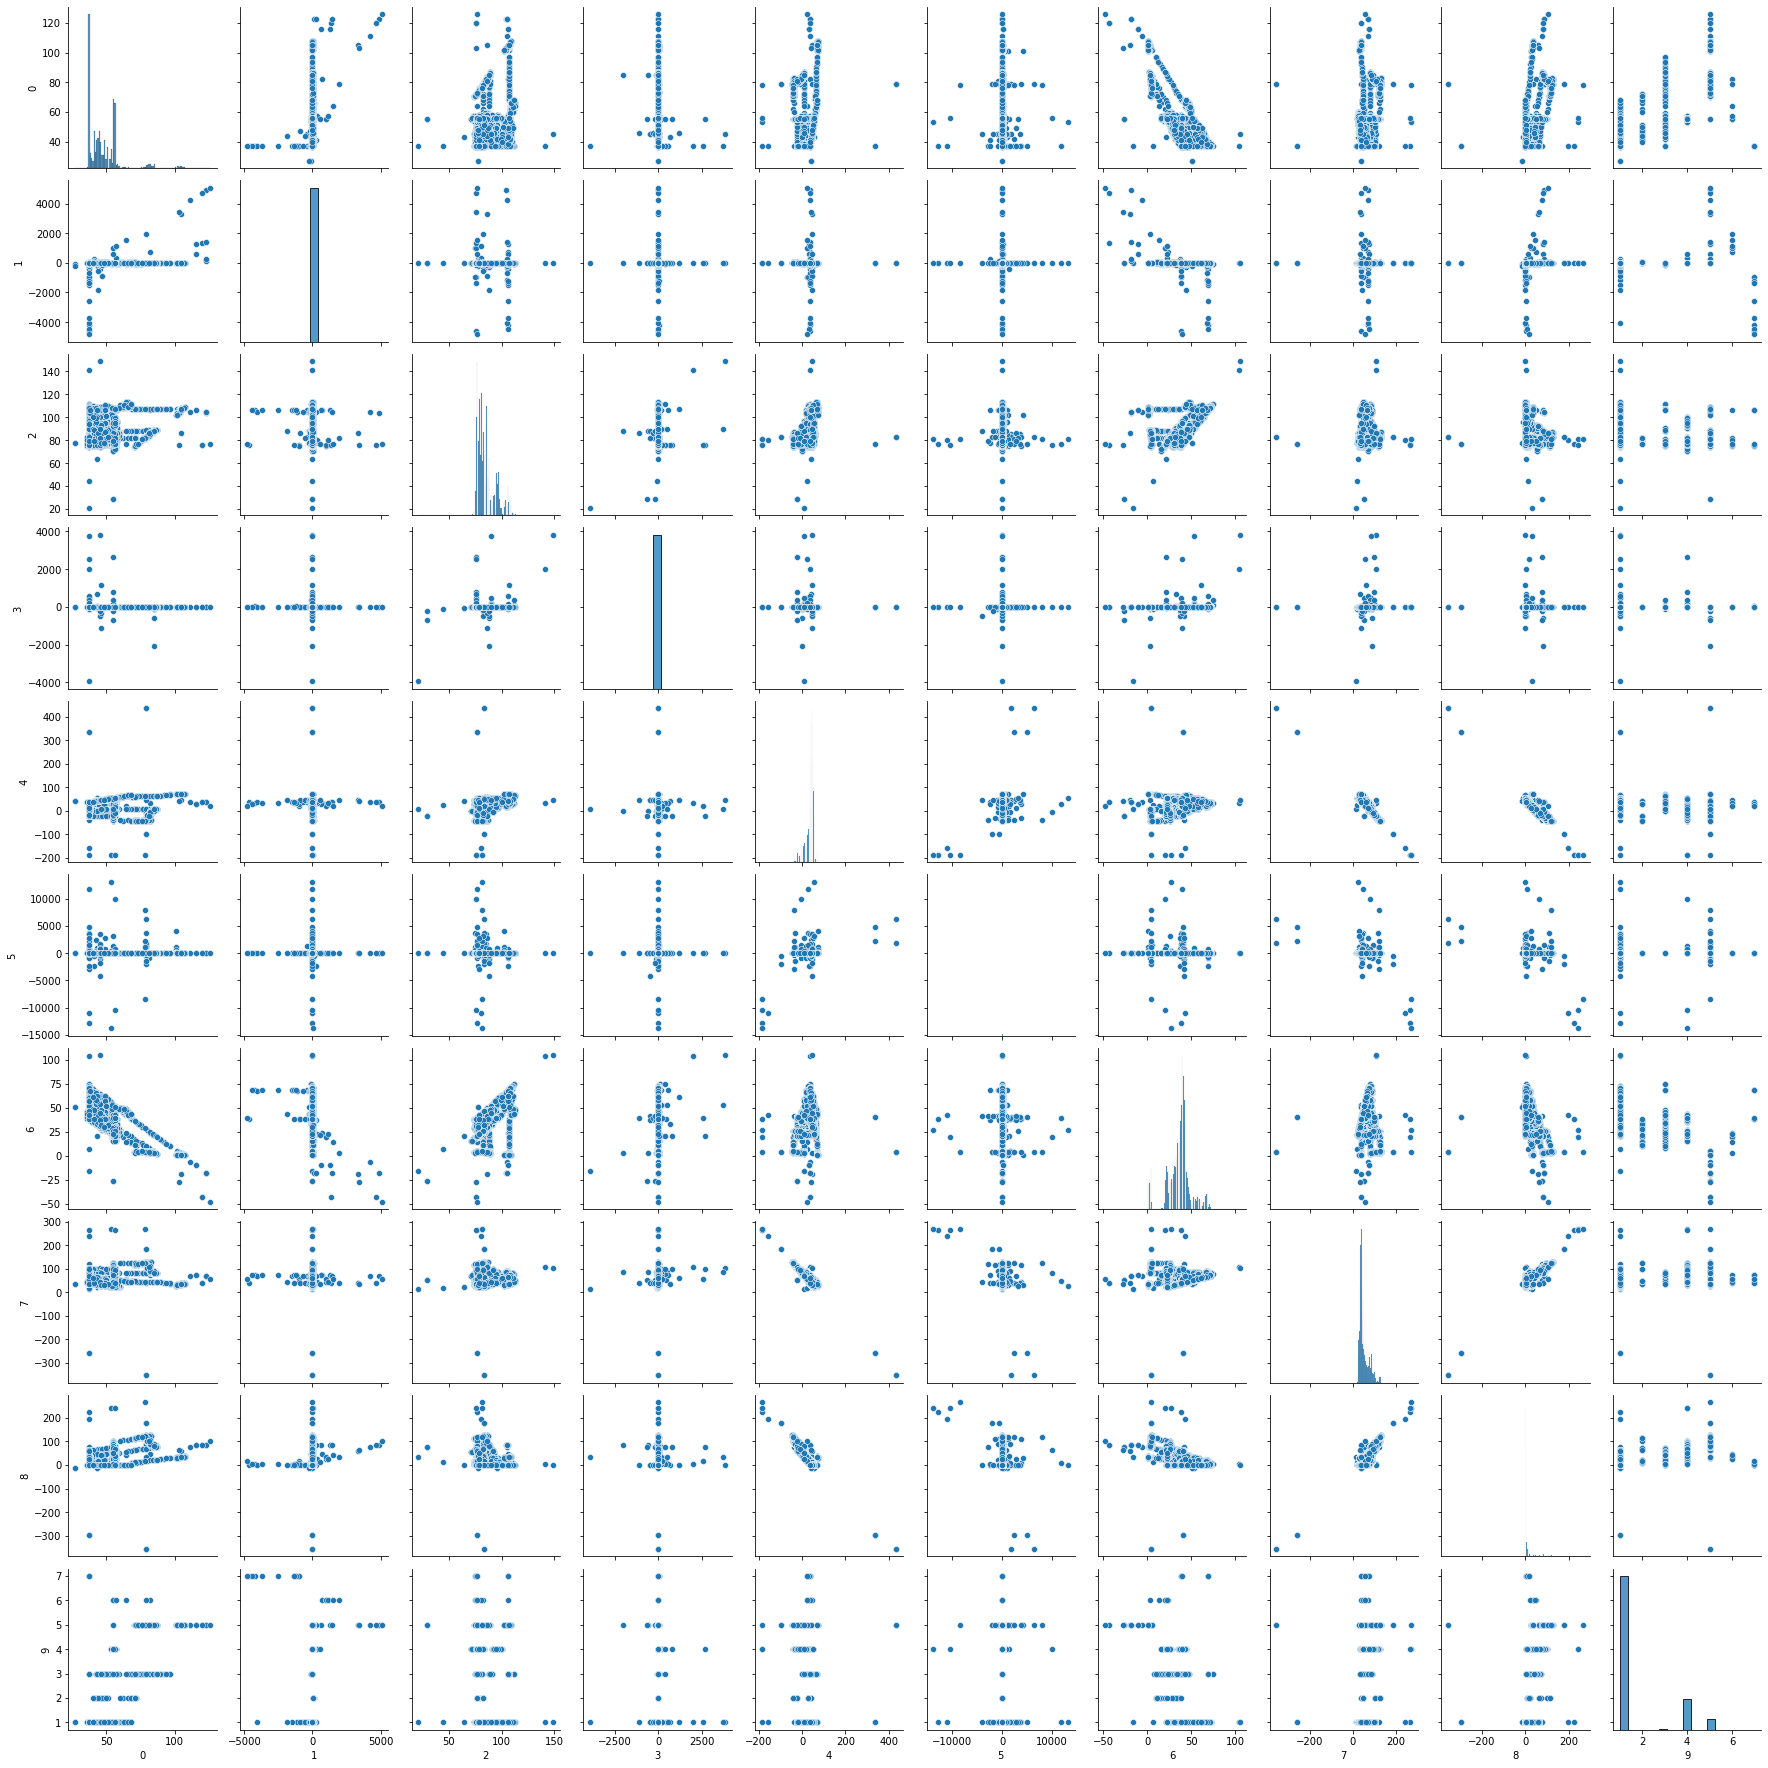

In [104]:
sns.pairplot(data)

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.066365,0.262622,-0.007774,-0.051460,0.007306,-0.757307,0.168417,0.526896,0.737641
1,0.066365,1.000000,-0.013422,-0.001609,0.000373,-0.001826,-0.070628,-0.005827,0.031235,-0.003978
2,0.262622,-0.013422,1.000000,0.042157,0.255181,-0.002909,0.430019,0.155282,-0.091279,0.145267
3,-0.007774,-0.001609,0.042157,1.000000,-0.004767,0.008286,0.036169,0.022352,0.000410,-0.003180
4,-0.051460,0.000373,0.255181,-0.004767,1.000000,0.103159,0.221277,-0.914963,-0.875212,-0.430602
5,0.007306,-0.001826,-0.002909,0.008286,0.103159,1.000000,-0.008569,-0.105569,-0.083378,0.000707
6,-0.757307,-0.070628,0.430019,0.036169,0.221277,-0.008569,1.000000,-0.053010,-0.555205,-0.593932
7,0.168417,-0.005827,0.155282,0.022352,-0.914963,-0.105569,-0.053010,1.000000,0.859527,0.505146
8,0.526896,0.031235,-0.091279,0.000410,-0.875212,-0.083378,-0.555205,0.859527,1.000000,0.722647
9,0.737641,-0.003978,0.145267,-0.003180,-0.430602,0.000707,-0.593932,0.505146,0.722647,1.000000


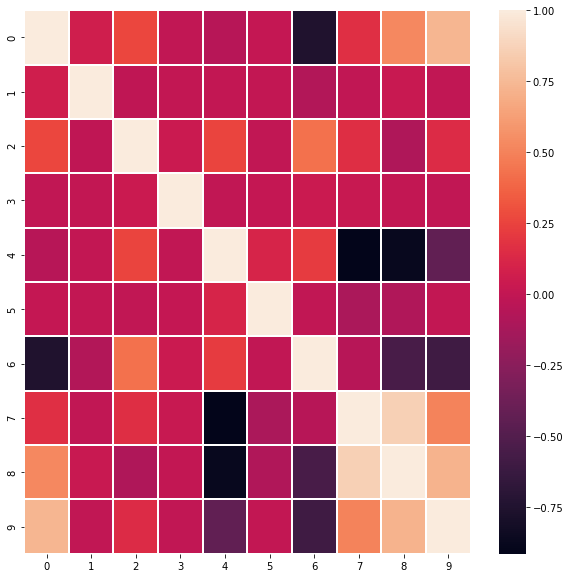

In [105]:
corr = df.corr("pearson")
plt.figure(figsize = (10,10))
sns.heatmap(corr, linewidth = 1)
corr

In [106]:
x_train, y_train = df.iloc[:, :-1], df.iloc[:, -1]
x_train.shape, y_train.shape

((43500, 9), (43500,))

In [107]:
df_test = pd.read_csv("dataset/shuttle.tst", sep = " ", header = None)
df_test

,0,1,2,3,4,5,6,7,8,9
0,55,0,81,0,-6,11,25,88,64,4
1,56,0,96,0,52,-4,40,44,4,4
2,50,-1,89,-7,50,0,39,40,2,1
3,53,9,79,0,42,-2,25,37,12,4
4,55,2,82,0,54,-6,26,28,2,1
...,...,...,...,...,...,...,...,...,...,...
14495,80,0,84,0,-36,-29,4,120,116,5
14496,55,0,81,0,-20,25,26,102,76,4
14497,55,0,77,0,12,-22,22,65,42,4
14498,37,0,103,0,18,-16,66,85,20,1


In [108]:
df_test.iloc[:, -1].value_counts()

1    11478
4     2155
5      809
3       39
2       13
6        4
7        2
Name: 9, dtype: int64

In [109]:
x_test, y_test = df_test.iloc[:, :-1], df_test.iloc[:, -1]
x_test.shape, y_test.shape

((14500, 9), (14500,))

# Classification using RandomForestClassifier

In [110]:
# pre prunning 
model = RandomForestClassifier(random_state = 0)
param_grid = {"n_estimators" : [50, 100, 150], 
              "max_depth" : [2, 4, 6, 8]}

gs = GridSearchCV(estimator = model, param_grid = param_grid)
gs.fit(x_train, y_train)
print("best parameters:", gs.best_estimator_)
print("best score:", gs.best_score_*100)

best parameters: RandomForestClassifier(max_depth=8, n_estimators=50, random_state=0)
best score: 99.97701149425288


In [111]:
max_depth_ = [2, 4, 6, 8]
test_scores = []
train_scores = []
for md in max_depth_:
    model = RandomForestClassifier(random_state = 0, n_estimators = 50, max_depth = md)
    model.fit(x_train, y_train)
    train_scores.append(accuracy_score(y_train, model.predict(x_train)))
    test_scores.append(accuracy_score(y_test, model.predict(x_test)))

train_scores, test_scores

([0.9257931034482758, 0.996919540229885, 0.9998620689655172, 1.0],
 [0.9293793103448276,
  0.9971034482758621,
  0.999448275862069,
  0.9997931034482759])

In [112]:
max_depth_ = np.array(max_depth_, dtype = np.int64)
train_scores = np.array(train_scores, dtype = "float")
test_scores = np.array(test_scores, dtype = "float")


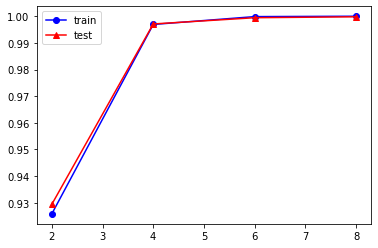

In [113]:
plt.figure()
plt.plot(max_depth_, train_scores, "bo-", label = "train")
plt.plot(max_depth_, test_scores, "r^-", label = "test")
plt.legend()
#plt.ylim([0.99, 1.01])
plt.show()

In [114]:
model = RandomForestClassifier(random_state = 0, n_estimators = 50, max_depth = 6)
model.fit(x_train, y_train)


RandomForestClassifier(max_depth=6, n_estimators=50, random_state=0)

In [115]:
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

In [116]:
with open("model.pkl", "rb") as f_:
    model = pickle.load(f_)

In [117]:
model

RandomForestClassifier(max_depth=6, n_estimators=50, random_state=0)

In [118]:
cm = confusion_matrix(y_test, model.predict(x_test))
cm

array([[11478,     0,     0,     0,     0,     0,     0],
       [    1,    11,     0,     1,     0,     0,     0],
       [    1,     0,    38,     0,     0,     0,     0],
       [    0,     0,     0,  2155,     0,     0,     0],
       [    0,     0,     0,     0,   809,     0,     0],
       [    0,     0,     2,     1,     0,     1,     0],
       [    0,     0,     2,     0,     0,     0,     0]], dtype=int64)

In [120]:
# prediction accuracy for each class
for i in range(7):
    print(cm[i,i]*100/sum(cm[i, :]))

100.0
84.61538461538461
97.43589743589743
100.0
100.0
25.0
0.0
